In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
sf_bbvi_small = pd.read_csv("test.csv", index_col=None)
elbo = sf_bbvi_small["ELBO"].to_numpy()[400:] - 5000
times = sf_bbvi_small["sec"].to_numpy()[400:]

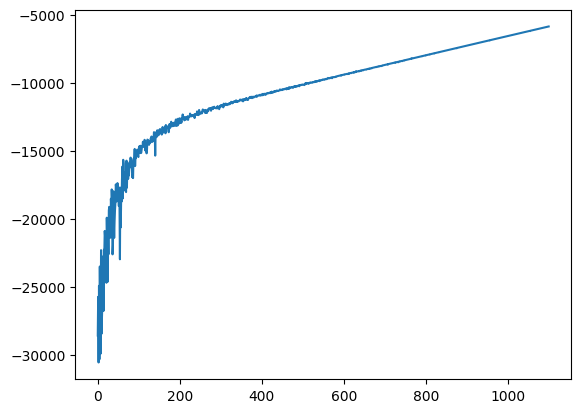

In [30]:
plt.plot(elbo)